In [ ]:
### To-Do
# X) make fit_function general enough for pswarms optimization -> dropout rate, layers, nodes, etc
# X) write function that runs fit_function ~5 times and keeps ensemble + best
# X) put all this in a script
# X) save output distribution and history plots in model directory
# X) log file of some kind?
# X) e_sig vs (1-e_bkg) plot
# X) add sig text to preds plot
# 8) implement pyswarms optimization
# -) ... 
# N) k-fold validation

In [1]:
import sys, os
sys.path.insert(0, '/home/btannenw/Desktop/ML/dihiggsMLProject/')
from utils.commonFunctions import *

In [2]:
from lorentzBoostAnalyzer import lorentzBoostAnalyzer as lba

Using TensorFlow backend.


Dihiggs file:  /home/btannenw/Desktop/ML/dihiggsMLProject/data/pp2hh4b_500kEvents_0PU_v2-05__top4inPt-4tags-10jets_combined_csv.csv
QCD file:  /home/btannenw/Desktop/ML/dihiggsMLProject/data/ppTo4b_2MEvents_0PU_v2-05__top4inPt-4tags-10jets_combined_csv.csv


(array([3.3195e+04, 4.0870e+04, 2.5949e+04, 1.1225e+04, 3.8130e+03,
        1.1030e+03, 2.6100e+02, 5.6000e+01, 5.0000e+00, 4.0000e+00]),
 array([ 4. ,  4.9,  5.8,  6.7,  7.6,  8.5,  9.4, 10.3, 11.2, 12.1, 13. ]),
 <a list of 10 Patch objects>)

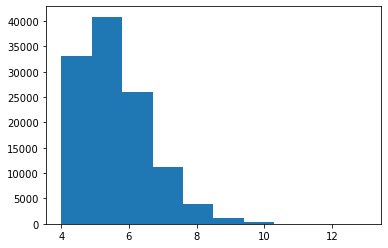

In [3]:
#*** 1. Import data and check stuff
testingFraction = 0.3

# *** A. Import Dataset
hh_raw, qcd_raw = importDatasets()

plt.hist(qcd_raw.nJets, bins=10)

In [4]:
test = lba(nJets=8, signalData= hh_raw, backgroundData = qcd_raw, modelName= 'test10_all', testingFraction=testingFraction)
test.makeJetVectors()

N_sig = 78876 , N_bkg = 116481
195357 rows of total data with  195357 labels [Train+Test]
136749 rows of training data with  136749 labels [Train]
58608 rows of testing data with  58608 labels [Test]
(136749, 32)


++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 80
nodesInSecondHiddenLayer = 256
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ Begin model training

Train on 136749 samples, validate on 58608 samples
Epoch 1/3
136749/136749 [==============================] - 10s 72us/sample - loss: 0.6057 - categorical_accuracy: 0.6903 - auc: 0.7635 - val_loss: 0.5681 - val_categorical_accuracy: 0.7207 - val_auc: 0.7996
Epoch 2/3
136749/136749 [==============================] - 6s 47us/sample - loss: 0.5354 - categorical_accuracy: 0.7441 - auc: 0.8261 - val_loss: 0.5159 - val_categorical_accuracy: 0.7566 - val_auc: 0.8403
Epoch 3/3
136749/136749 [==============================] - 6s 47us/sample - loss: 0.5037 - categorical_accuracy: 0.7663 - auc: 0.8490 - val_loss: 0.4920 - val_categorical_accuracy: 0.7738 - val_auc: 0.8566


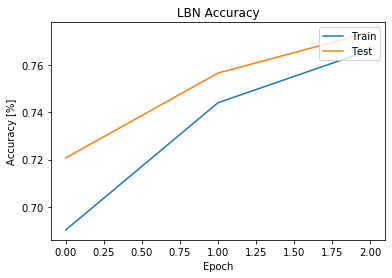

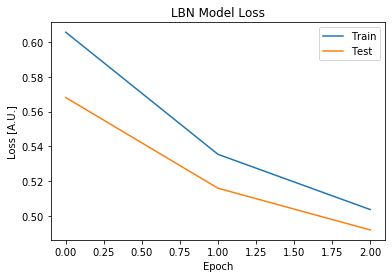

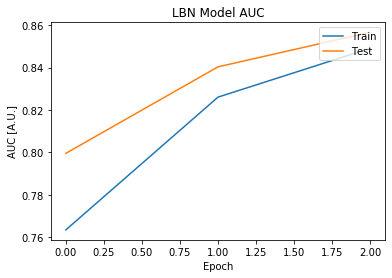

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/test10_all/test10_all_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 80
nodesInSecondHiddenLayer = 256
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/test10_all/test10_all.hdf5


In [5]:
test.fit_model(epochs=3, batch_size=400, patience=10)

(58608, 2)
++ Plotting test sample prediction results
23724 34884
nSig = 2357.79 , nBkg = 3638766.51 with significance = 1.236 +/- 0.02 for LBN Signal Score score > 0.737


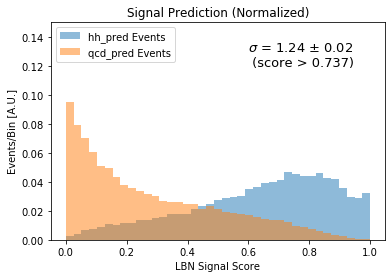

++ Making ROC curve


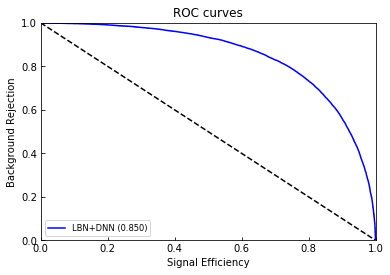

++ Calculating best significance
23724 34884
nSig = 2357.79 , nBkg = 3638766.51 with significance = 1.236 +/- 0.02 for ff-NN score > 0.737


(1.2360290843764086, 0.7373797622593967, 0.01980097445392732)

In [7]:
#test.test_model( test.model, savePlots=True )
test.test_model( test.best_model, savePlots=True)

In [ ]:
test2 = lba(nJets=8, signalData= hh_raw, backgroundData = qcd_raw, modelName= 'test5', testingFraction=testingFraction)
test2.makeJetVectors()
test2.runIterations(iterations=5, epochs=4, batch_size=400, patience=10)